<a href="https://colab.research.google.com/github/moneypitak/DWDM21/blob/main/Chap8Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

#Generate Data

In [18]:
from sklearn.datasets import make_blobs

In [19]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

# Explore Data

In [20]:
X.shape

(500, 2)

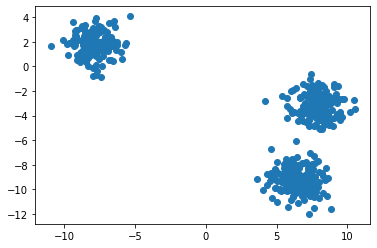

In [21]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0] , X[:,1])

# Clustering

## Import

In [22]:
from sklearn.cluster import KMeans

## Define

In [23]:
kmeans = KMeans(n_clusters=2, random_state=6)

## Train-Predict

In [24]:
y_clust = kmeans.fit_predict(X)
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

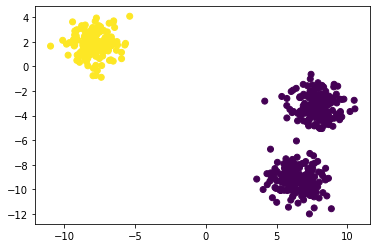

In [25]:
plt.scatter(X[:,0], X[:,1], c=y_clust)

## 3 clusters

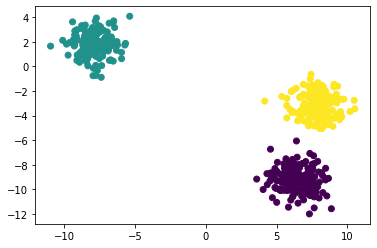

In [26]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## 4 clusters

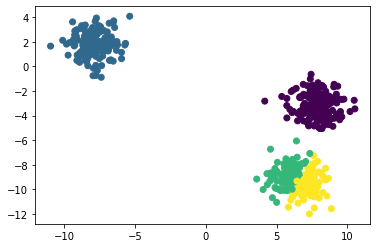

In [27]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## 5 clusters

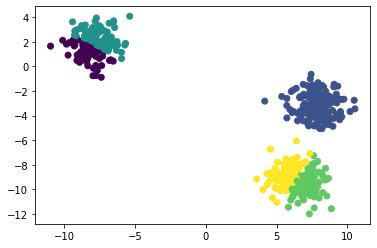

In [28]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

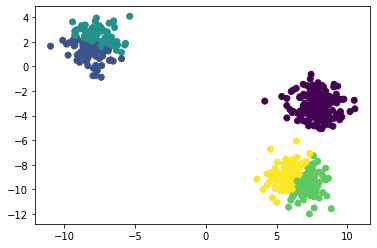

In [29]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

# Example Application (Color Quantization)

In [30]:
import cv2
import os

In [31]:
img = cv2.imread('/content/1lee.jfif')

In [32]:
img.shape

(166, 233, 3)

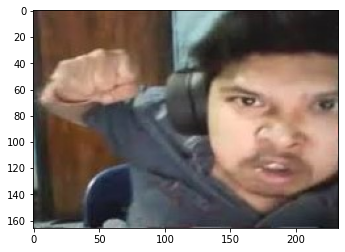

In [33]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

## นับจำนวนสี

In [34]:
import numpy as np

In [35]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(19073, 3)

## จัดกลุ่มสีให้เหลือ 16 สี

In [36]:
myquantize = KMeans(n_clusters=16,random_state=6)

## แปลงข้อมูลให้อยู่ในรูป row-column

In [37]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(38678, 3)

In [38]:
final_color = myquantize.fit_predict(img_row)

## ใช้ centroid เป็นตัวแทนของสี

In [39]:
centroid = myquantize.cluster_centers_

In [40]:
centroid

array([[241.90589993, 203.64675131, 179.43315907],
       [ 61.0327404 ,  62.85073473,  68.31038928],
       [182.83592814, 141.30139721, 119.47345309],
       [ 74.92148109,  78.62237395,  87.28545168],
       [ 49.16941102,  46.94205193,  47.55351488],
       [107.03286979,  73.03944374,  52.56409608],
       [132.59905938, 101.8824221 ,  85.03468548],
       [ 32.85138004,  30.09978769,  31.34913895],
       [144.44291092, 161.11668758, 162.34378921],
       [200.39403579, 159.60795229, 137.37176938],
       [ 90.35297619,  99.51845238, 106.80654762],
       [158.95022624, 121.33031674, 101.97285068],
       [116.9829932 , 127.32653061, 128.72675737],
       [163.46098266, 195.05780347, 196.38150289],
       [ 86.76951301,  59.22448299,  39.98832555],
       [219.32844828, 180.45948276, 158.69827586]])

In [41]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

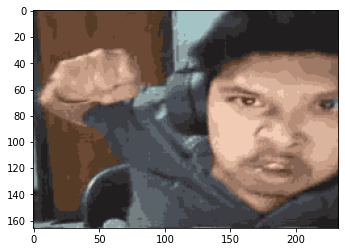

In [42]:
plt.imshow(new_img/255)

In [43]:
plt.imsave('img.jpg',new_img/255)

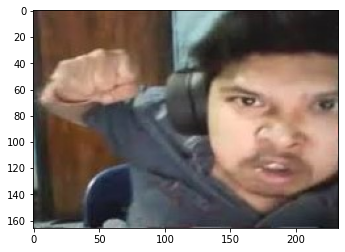

In [44]:
plt.imshow(RGB_img)